# Training Metrics Visualization

This notebook processes training metrics CSV files and creates visualization graphs.

For each dataset, it creates:
1. Loss graph: Training and Validation loss with best validation loss marked
2. Top-k Accuracy graph: Training Top1, Training Top5, Evaluation Top1, Evaluation Top5

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

In [25]:
# Load all CSV files from saved_csv folder
csv_folder = Path('saved_csv')
csv_files = list(csv_folder.glob('*_training_metrics.csv'))

print(f"Found {len(csv_files)} CSV files:")
for f in csv_files:
    print(f"  - {f.name}")

# Load datasets
datasets = {}
for csv_file in csv_files:
    dataset_name = csv_file.stem.replace('_training_metrics', '')
    df = pd.read_csv(csv_file)
    datasets[dataset_name] = df
    print(f"\n{dataset_name.upper()}:")
    print(f"  Shape: {df.shape}")
    print(f"  Columns: {list(df.columns)}")
    print(f"  Epochs: {df['epoch'].min()} - {df['epoch'].max()}")

Found 2 CSV files:
  - ucla_training_metrics.csv
  - ntu_xsub_training_metrics.csv

UCLA:
  Shape: (65, 7)
  Columns: ['epoch', 'train_loss', 'train_top1', 'train_top5', 'eval_loss', 'eval_top1', 'eval_top5']
  Epochs: 1 - 65

NTU_XSUB:
  Shape: (40, 7)
  Columns: ['epoch', 'train_loss', 'train_top1', 'train_top5', 'eval_loss', 'eval_top1', 'eval_top5']
  Epochs: 1 - 40


## 1. Loss Graphs (Train & Validation)

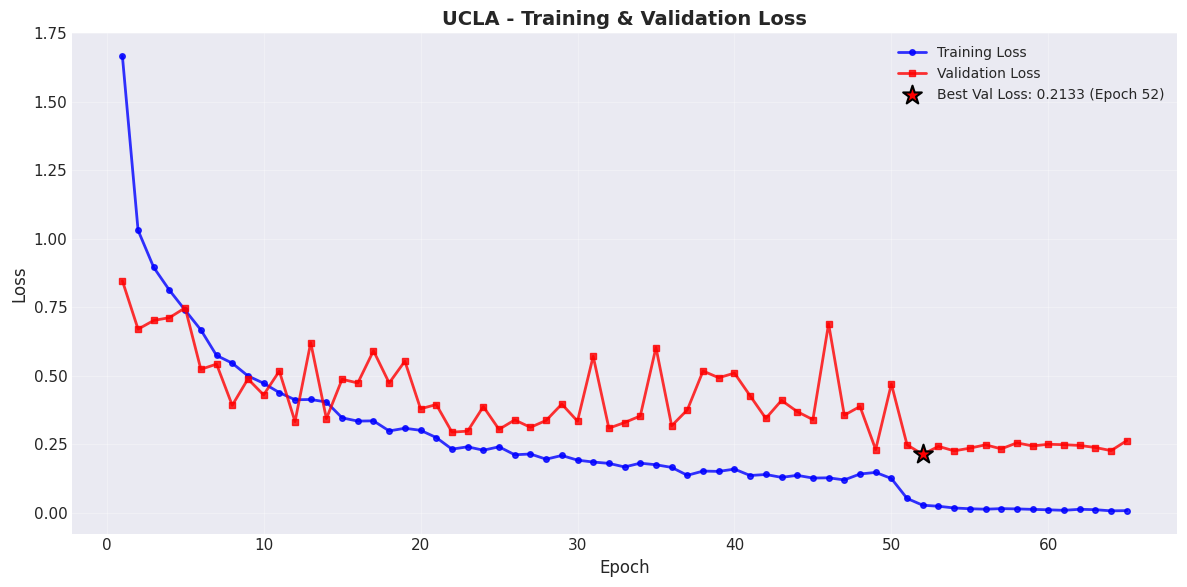

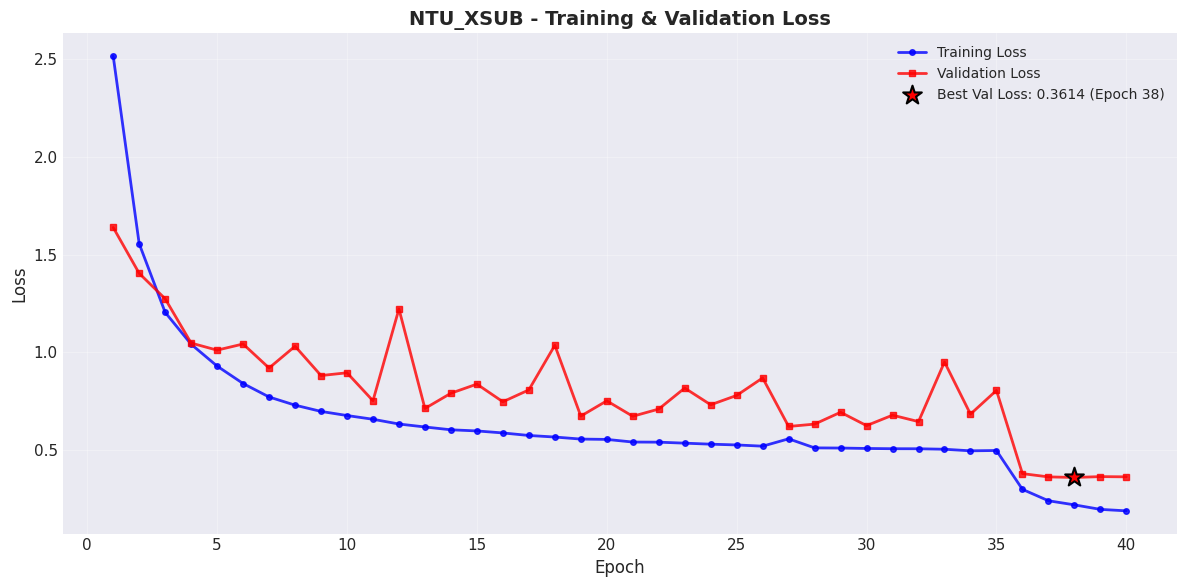

In [26]:
# Create loss graph for each dataset
for name, df in datasets.items():
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    # Plot training loss
    ax.plot(df['epoch'], df['train_loss'], label='Training Loss', 
            marker='o', markersize=4, linewidth=2, alpha=0.8, color='blue')
    
    # Plot evaluation loss
    ax.plot(df['epoch'], df['eval_loss'], label='Validation Loss', 
            marker='s', markersize=4, linewidth=2, alpha=0.8, color='red')
    
    # Find and mark best validation loss (minimum)
    best_eval_loss_idx = df['eval_loss'].idxmin()
    best_epoch = df.loc[best_eval_loss_idx, 'epoch']
    best_eval_loss = df.loc[best_eval_loss_idx, 'eval_loss']
    
    # Mark best validation loss point
    ax.scatter(best_epoch, best_eval_loss, s=200, color='red', 
               marker='*', zorder=5, label=f'Best Val Loss: {best_eval_loss:.4f} (Epoch {best_epoch})',
               edgecolors='black', linewidths=1.5)
    
    ax.set_xlabel('Epoch', fontsize=12)
    ax.set_ylabel('Loss', fontsize=12)
    ax.set_title(f'{name.upper()} - Training & Validation Loss', fontsize=14, fontweight='bold')
    ax.legend(fontsize=10, loc='best')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'{name}_loss.png', dpi=300, bbox_inches='tight')
    plt.show()

## 2. Top-k Accuracy Graphs (Train Top1, Train Top5, Eval Top1, Eval Top5)

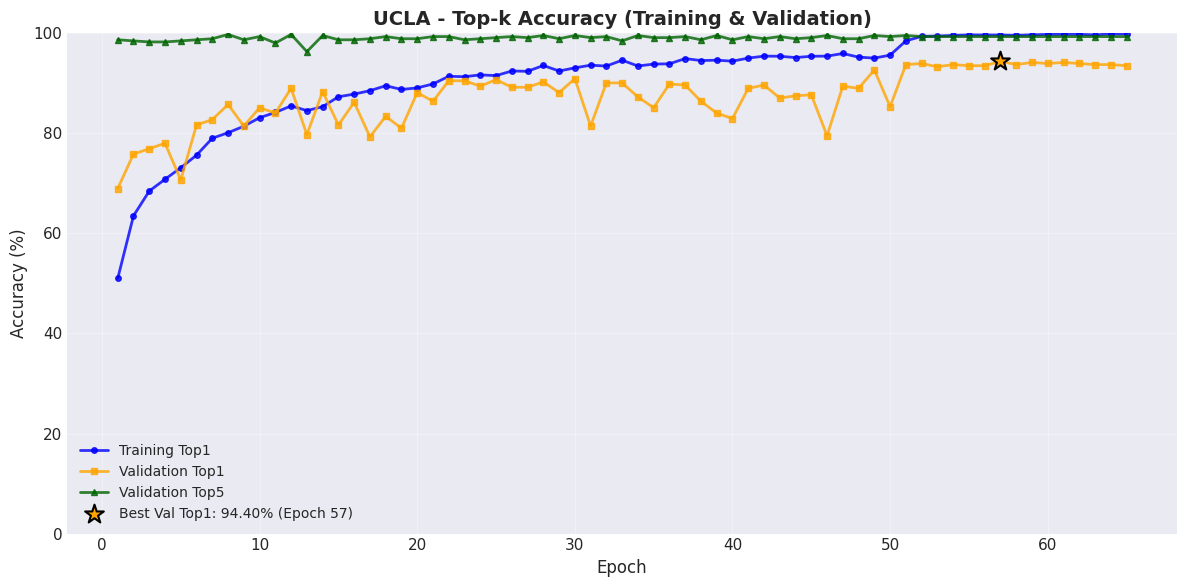

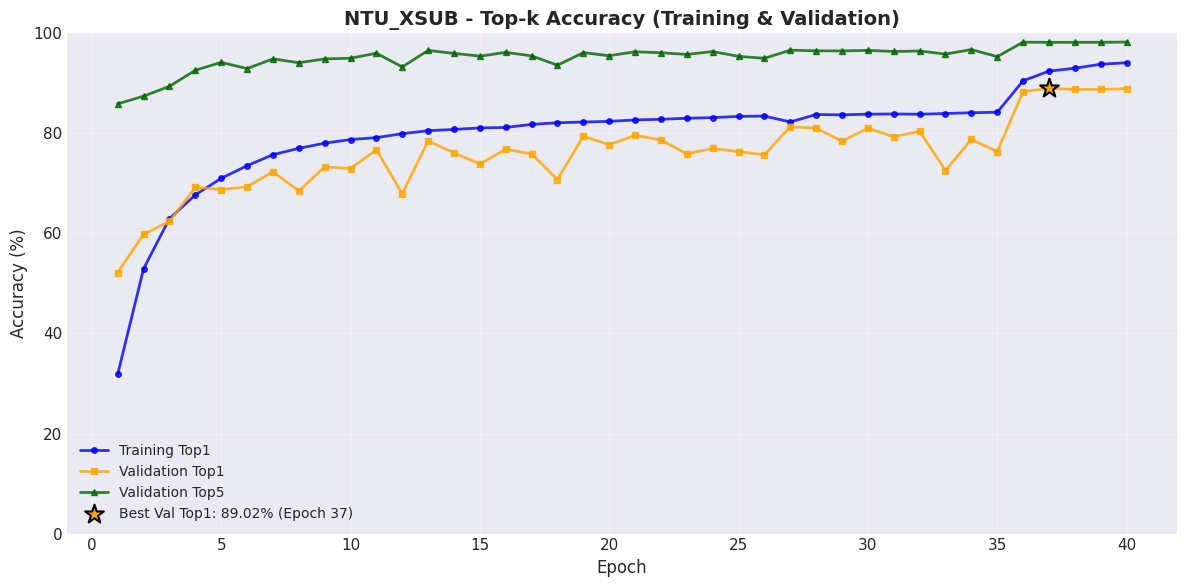

In [29]:
# Create top-k accuracy graph for each dataset
for name, df in datasets.items():
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    # Plot training top1 accuracy
    ax.plot(df['epoch'], df['train_top1'], label='Training Top1', 
            marker='o', markersize=4, linewidth=2, alpha=0.8, color='blue')
    
    # Plot training top5 accuracy (if available)
    if 'train_top5' in df.columns and not df['train_top5'].isna().all():
        train_top5_valid = df['train_top5'].dropna()
        if len(train_top5_valid) > 0:
            epochs_top5 = df.loc[train_top5_valid.index, 'epoch']
            ax.plot(epochs_top5, train_top5_valid, label='Training Top5', 
                    marker='^', markersize=4, linewidth=2, alpha=0.8, color='purple')
    
    # Plot evaluation top1 accuracy
    ax.plot(df['epoch'], df['eval_top1'], label='Validation Top1', 
            marker='s', markersize=4, linewidth=2, alpha=0.8, color='orange')
    
    # Plot evaluation top5 accuracy
    ax.plot(df['epoch'], df['eval_top5'], label='Validation Top5', 
            marker='^', markersize=4, linewidth=2, alpha=0.8, color='darkgreen')
    
    # Find and mark best validation top1 accuracy
    best_eval_top1_idx = df['eval_top1'].idxmax()
    best_epoch_top1 = df.loc[best_eval_top1_idx, 'epoch']
    best_eval_top1 = df.loc[best_eval_top1_idx, 'eval_top1']
    
    # Mark best validation top1 point
    ax.scatter(best_epoch_top1, best_eval_top1, s=200, color='orange', 
               marker='*', zorder=5, label=f'Best Val Top1: {best_eval_top1:.2f}% (Epoch {best_epoch_top1})',
               edgecolors='black', linewidths=1.5)
    
    ax.set_xlabel('Epoch', fontsize=12)
    ax.set_ylabel('Accuracy (%)', fontsize=12)
    ax.set_title(f'{name.upper()} - Top-k Accuracy (Training & Validation)', fontsize=14, fontweight='bold')
    ax.legend(fontsize=10, loc='best')
    ax.grid(True, alpha=0.3)
    ax.set_ylim([0, 100])
    
    plt.tight_layout()
    plt.savefig(f'{name}_accuracy.png', dpi=300, bbox_inches='tight')
    plt.show()

## 3. Summary Statistics

In [28]:
# Print summary statistics for each dataset
for name, df in datasets.items():
    print(f"\n{'='*60}")
    print(f"{name.upper()} - Summary Statistics")
    print(f"{'='*60}")
    
    # Best validation loss
    best_eval_loss_idx = df['eval_loss'].idxmin()
    best_eval_loss = df.loc[best_eval_loss_idx, 'eval_loss']
    best_eval_loss_epoch = df.loc[best_eval_loss_idx, 'epoch']
    
    # Best validation top1
    best_eval_top1_idx = df['eval_top1'].idxmax()
    best_eval_top1 = df.loc[best_eval_top1_idx, 'eval_top1']
    best_eval_top1_epoch = df.loc[best_eval_top1_idx, 'epoch']
    
    # Best validation top5
    best_eval_top5_idx = df['eval_top5'].idxmax()
    best_eval_top5 = df.loc[best_eval_top5_idx, 'eval_top5']
    best_eval_top5_epoch = df.loc[best_eval_top5_idx, 'epoch']
    
    print(f"\nBest Validation Loss: {best_eval_loss:.4f}")
    print(f"  Achieved at epoch: {best_eval_loss_epoch}")
    print(f"  Train Loss at that epoch: {df.loc[best_eval_loss_idx, 'train_loss']:.4f}")
    print(f"  Val Top1 at that epoch: {df.loc[best_eval_loss_idx, 'eval_top1']:.2f}%")
    
    print(f"\nBest Validation Top1 Accuracy: {best_eval_top1:.2f}%")
    print(f"  Achieved at epoch: {best_eval_top1_epoch}")
    print(f"  Train Top1 at that epoch: {df.loc[best_eval_top1_idx, 'train_top1']:.2f}%")
    print(f"  Val Loss at that epoch: {df.loc[best_eval_top1_idx, 'eval_loss']:.4f}")
    
    print(f"\nBest Validation Top5 Accuracy: {best_eval_top5:.2f}%")
    print(f"  Achieved at epoch: {best_eval_top5_epoch}")
    
    print(f"\nFinal Metrics (Epoch {df['epoch'].max()}):")
    print(f"  Train Loss: {df['train_loss'].iloc[-1]:.4f}")
    print(f"  Train Top1: {df['train_top1'].iloc[-1]:.2f}%")
    if 'train_top5' in df.columns and not pd.isna(df['train_top5'].iloc[-1]):
        print(f"  Train Top5: {df['train_top5'].iloc[-1]:.2f}%")
    print(f"  Val Loss: {df['eval_loss'].iloc[-1]:.4f}")
    print(f"  Val Top1: {df['eval_top1'].iloc[-1]:.2f}%")
    print(f"  Val Top5: {df['eval_top5'].iloc[-1]:.2f}%")
    
    print(f"\nTotal Epochs: {len(df)}")


UCLA - Summary Statistics

Best Validation Loss: 0.2133
  Achieved at epoch: 52
  Train Loss at that epoch: 0.0278
  Val Top1 at that epoch: 93.97%

Best Validation Top1 Accuracy: 94.40%
  Achieved at epoch: 57
  Train Top1 at that epoch: 99.67%
  Val Loss at that epoch: 0.2335

Best Validation Top5 Accuracy: 99.78%
  Achieved at epoch: 8

Final Metrics (Epoch 65):
  Train Loss: 0.0081
  Train Top1: 99.86%
  Val Loss: 0.2638
  Val Top1: 93.53%
  Val Top5: 99.35%

Total Epochs: 65

NTU_XSUB - Summary Statistics

Best Validation Loss: 0.3614
  Achieved at epoch: 38
  Train Loss at that epoch: 0.2214
  Val Top1 at that epoch: 88.78%

Best Validation Top1 Accuracy: 89.02%
  Achieved at epoch: 37
  Train Top1 at that epoch: 92.44%
  Val Loss at that epoch: 0.3643

Best Validation Top5 Accuracy: 98.25%
  Achieved at epoch: 40

Final Metrics (Epoch 40):
  Train Loss: 0.1908
  Train Top1: 94.12%
  Val Loss: 0.3645
  Val Top1: 88.94%
  Val Top5: 98.25%

Total Epochs: 40
